# **CUHK-STAT3009: Final Quiz** (100 points)

**Rules and Guidelines:**

* You are allowed to use lecture notes, Jupyter notebooks, and online resources to complete the quiz.
* You must work independently and refrain from communicating with others during the quiz.
* The use of AI-powered tools, such as ChatGPT, Claude, Gemini, and similar platforms, is strictly prohibited.
* Additionally, social media platforms like WhatsApp, WeChat, and others are not permitted.

**Academic Integrity:**

Please acknowledge that violating these rules is equivalent to dishonesty, and please understand that doing so would result in a score of zero on the quiz.

> I've taken note of the instructions. To confirm, I will:
>
> 1. Read and follow the rules outlined in the [Final Quiz Instructions](https://hackmd.io/TbSfC1NLSuuhcoCSYoLVFg?view) .
> 2. Complete the quiz to the best of my abilities.
> 3. Understand that the grade will be curved.

# **Q1: Recsys Evaluation Metrics** (5 + 5 points)

## **Q1.1: Mean Absolute Percentage Error**

In recommender systems, the accuracy of predicted ratings is crucial. One way to evaluate this accuracy is by computing the Mean Absolute Percentage Error (MAPE) between the actual ratings and the predicted ratings. The MAPE is defined as:

$$
\text{MAPE} = \frac{1}{n} \sum_{i=1}^{n} \left|\frac{r_i - \hat{r}_i}{r_i}\right| \times 100
$$

where $r_i$ is the actual rating and $\hat{r}_i$ is the predicted rating.

Given the following arrays `actual_ratings` and `predicted_ratings`, compute the MAPE:

```python
import numpy as np

actual_ratings = np.array([4.0, 3.0, 5.0, 2.0, 4.5])
predicted_ratings = np.array([3.8, 3.2, 4.8, 2.2, 4.2])
```

**Task:**

Develop a Python function `MAPE(y_true, y_pred)` to compute the MAPE. Then, use this function to calculate the MAPE for the provided example.

In [ ]:
## Your solution here.
import numpy as np

def mape(true_ratings, pred_ratings):
  mape = np.mean(np.abs((true_ratings - pred_ratings)/true_ratings)) * 100
  return mape

actual_ratings = np.array([4.0, 3.0, 5.0, 2.0, 4.5])
predicted_ratings = np.array([3.8, 3.2, 4.8, 2.2, 4.2])

mape_score = mape(actual_ratings, predicted_ratings)

print(f'The required MAPE is {mape_score}')


The required MAPE is 6.4666666666666694


## **Q1.2: Implementing a Tolerant MAPE Function**

If `r_i` is zero, we may encounter zero-division errors. To address this issue, modify the `MAPE` function to handle zero-division errors when an actual rating `r_i` is zero. Implement **one of the following strategies** to handle this scenario:

1. **Ignore zero-rated items**: Exclude items with zero actual ratings from the MAPE calculation.
2. **Replace zero-rated items with a small value**: Replace actual ratings of zero with a small positive value (e.g., 1e-6) to avoid division by zero.
3. **Use a robust division function**: Implement a robust division function that returns a specific value (e.g., 0 or 1) when the denominator is zero.

**Task:**

Please select *one of the strategies* to implement a new `MAPE` function that handles zero-division errors when an actual rating `r_i` is zero.

In [ ]:
## Your solution here.

## method 1
import numpy as np

def tol_mape(true_ratings, pred_ratings):
  true_corr = []
  pred_corr = []

  for i in range(len(true_ratings)):
    if true_ratings[i]!=0:
      true_corr.append(true_ratings[i])
      pred_corr.append(pred_ratings[i])

  true_corr = np.array(true_corr)
  pred_corr = np.array(pred_corr)

  mape = np.mean(np.abs((true_corr - pred_corr)/true_corr)) * 100
  return mape

actual_ratings = np.array([0.0, 0.0, 5.0, 0.0, 4.5])
predicted_ratings = np.array([3.8, 3.2, 4.8, 2.2, 4.2])

mape_score = tol_mape(actual_ratings, predicted_ratings)

print(f'The required MAPE is {mape_score}')

The required MAPE is 5.333333333333333


In [ ]:
## method 2
import numpy as np

def tol_mape(true_ratings, pred_ratings):
  true_corr = []

  for i in range(len(true_ratings)):
    if true_ratings[i]==0:
      true_corr.append(1e-6)
    else:
      true_corr.append(true_ratings[i])

  true_corr = np.array(true_corr)

  mape = np.mean(np.abs((true_corr - pred_ratings)/true_corr)) * 100
  return mape

actual_ratings = np.array([0.0, 0.0, 5.0, 0.0, 4.5])
predicted_ratings = np.array([3.8, 3.2, 4.8, 2.2, 4.2])

mape_score = tol_mape(actual_ratings, predicted_ratings)

print(f'The required MAPE is {mape_score}')

The required MAPE is 183999942.1333333


# **Q2: Median-based Baseline Recsys** (10 + 5 points)

In this task, you will implement a user-/item-Median based recommender system using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

## **Q2.1: User/Item Median-based Baseline Recsys**


**Task:**

- **Class Development.** Create custom classes `UserMedianRS` and `ItemMedianRS` that inherits from `sklearn.BaseEstimator`. Implement the `fit` method to compute the parameter, and the `predict` method to generate predictions based on the user-/item- median formula:

  - `UserMedianRS`: compute the median of all observed ratings associated with user-$u$:

  $$\widehat{r}_{ui} = r_u^{(m)} = \text{median}\big(\{r_{u i'}\}_{(u,i') \in \Omega}\big)$$

  - `ItemMedianRS`: compute the median of all observed ratings associated with item-$i$:

  $$\widehat{r}_{ui} = r_i^{(m)} = \text{median}\big(\{r_{u' i}\}_{(u',i) \in \Omega}\big)$$



- **Fit and Evaluation.** Fit the custom recommender system to the training data and generate predictions for the test data. Compute and report the Root Mean Squared Error (RMSE) for the predictions.


In [ ]:
## Your solution there.
import numpy as np
from sklearn.base import BaseEstimator

class UserMedianRS(BaseEstimator):
    def __init__(self, n_user):
        self.n_user = n_user
        self._user_median = np.zeros(n_user)

    def fit(self, X, y):
        for user_tmp in range(self.n_user):
            user_index = np.where(X[:, 0] == user_tmp)[0]
            if len(user_index) == 0:
                self._user_median[user_tmp] = 0
            else:
                self._user_median[user_tmp] = np.median(y[user_index])
        return self

    def predict(self, X):
        user_index = X[:, 0]
        return self._user_median[user_index]

class ItemMedianRS(BaseEstimator):
    def __init__(self, n_item):
        self.n_item = n_item
        self._item_median = np.zeros(n_item)

    def fit(self, X, y):
        for item_tmp in range(self.n_item):
            item_index = np.where(X[:, 1] == item_tmp)[0]
            if len(item_index) == 0:
                self._item_median[item_tmp] = 0
            else:
                self._item_median[item_tmp] = np.median(y[item_index])

        return self

    def predict(self, X):
        item_index = X[:, 1]
        return self._item_median[item_index]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
X_train, y_train = train[['user_id', 'movie_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'movie_id']].values, test['rating'].values

n_user = len(set(X_train[:,0]).union(X_test[:,0]))
n_item = len(set(X_train[:,1]).union(X_test[:,1]))

userMedRS = UserMedianRS(n_user)
userMedRS.fit(X_train, y_train)
y_user_pred = userMedRS.predict(X_test)

print(f'UserMed | RMSE: {rmse(y_test,y_user_pred)}')

itemMedRS = ItemMedianRS(n_item)
itemMedRS.fit(X_train, y_train)
y_item_pred = itemMedRS.predict(X_test)

print(f'ItemMed | RMSE: {rmse(y_test,y_item_pred)}')



UserMed | RMSE: 1.1031046984592117
ItemMed | RMSE: 1.1741791445406151


## **Q2.2: Average User/Item Median-based Baseline Recsys**


**Task:**

- **Class Development.** Create a custom class `AveUserItemMedianRS` that inherits from `sklearn.BaseEstimator`. Implement the `fit` method to compute the parameters and the `predict` method to generate predictions based on the average of user-item median formula:

$$
\widehat{r}_{ui} = \frac{1}{2}\big( r_{u}^{(m)} + r_{i}^{(m)} \big),
$$
where $r_{u}^{(m)}$ and $r_{i}^{(m)}$ are defined previously.

- **Fit and Evaluation.** Fit the custom recommender system to the training data and generate predictions for the test data. Compute and report the Root Mean Squared Error (RMSE) for the predictions.


In [ ]:
## Your solution there.
import numpy as np
from sklearn.base import BaseEstimator

class UserItemMedianRS(BaseEstimator):
    def __init__(self, n_user, n_item):
        self.n_user = n_user
        self._user_median = np.zeros(n_user)
        self.n_item = n_item
        self._item_median = np.zeros(n_item)

    def fit(self, X, y):
        for user_tmp in range(self.n_user):
            user_index = np.where(X[:, 0] == user_tmp)[0]
            if len(user_index) == 0:
                self._user_median[user_tmp] = 0
            else:
                self._user_median[user_tmp] = np.median(y[user_index])
        for item_tmp in range(self.n_item):
            item_index = np.where(X[:, 1] == item_tmp)[0]
            if len(item_index) == 0:
                self._item_median[item_tmp] = 0
            else:
                self._item_median[item_tmp] = np.median(y[item_index])
        return self

    def predict(self, X):
        user_index = X[:, 0]
        item_index = X[:, 1]
        return (self._user_median[user_index] + self._item_median[item_index]) / 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
X_train, y_train = train[['user_id', 'movie_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'movie_id']].values, test['rating'].values

n_user = len(set(X_train[:,0]).union(X_test[:,0]))
n_item = len(set(X_train[:,1]).union(X_test[:,1]))

userItemMedRS = UserItemMedianRS(n_user, n_item)
userItemMedRS.fit(X_train, y_train)
y_user_item_pred = userItemMedRS.predict(X_test)

print(f'UserItemMed | RMSE: {rmse(y_test,y_user_item_pred)}')

UserItemMed | RMSE: 1.0204673053248103


# **Q3: SVD / MF Models** (10 + 5 + 10 + 15 points)

## **Q3.1: Basic Usage**

Import the `SVD` class from our GitHub repository: https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py.

You will implement a SVD model using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

**Task:**

Your task is to train an `SVD` model with $K = 10$ and $\lambda = 0.02$ using the provided dataset and predict the ratings for the test dataset.

> The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
## Your solution here.
user = "statmlben"
repo = "CUHK-STAT3009"
src = "src"
pyfile = "TabRS.py"
#Add a .py file to menu "TabRS.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2025-11-22 07:29:30--  https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/src/TabRS.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9001 (8.8K) [text/plain]
Saving to: ‘TabRS.py’

TabRS.py            100%[===================>]   8.79K  --.-KB/s    in 0s      

2025-11-22 07:29:30 (18.4 MB/s) - ‘TabRS.py’ saved [9001/9001]



In [ ]:
from TabRS import SVD
import numpy as np
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
X_train, y_train = train[['user_id', 'movie_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'movie_id']].values, test['rating'].values

n_user = len(set(X_train[:,0]).union(X_test[:,0]))
n_item = len(set(X_train[:,1]).union(X_test[:,1]))

SVD_rs = SVD(n_user, n_item, K=10, lam=0.02)
SVD_rs.fit(X_train, y_train)
y_SVD_pred = SVD_rs.predict(X_test)
print(f'SVD_rs | RMSE: {rmse(y_test,y_SVD_pred)}')
print(f'y_pred: {y_SVD_pred}')



Fitting Reg-SVD: K: 10, lam: 0.02000
RegSVD-ALS: 0; obj: 1.356; rmse:1.158, diff: 1144.783
RegSVD-ALS: 1; obj: 0.762; rmse:0.873, diff: 0.594
RegSVD-ALS: 2; obj: 0.760; rmse:0.871, diff: 0.002
RegSVD-ALS: 3; obj: 0.759; rmse:0.871, diff: 0.000
RegSVD-ALS: 4; obj: 0.759; rmse:0.871, diff: 0.000
SVD_rs | RMSE: 0.9710457460727928
y_pred: [4.24404348 2.92383623 3.15290148 ... 4.07680568 1.50158174 2.99391633]


## **Q3.2: Overfitting and Underfitting** (Multiple-choice question)

### If you receive the following feedback from SVD training and validation evaluation on datasets, you may proceed to:

``` python
	Fitting Reg-SVD: K: 3, lam: 0.00010
	Reg-SVD: ite: 0; diff: 0.527 RMSE: 0.939
	Reg-SVD: ite: 1; diff: 0.050 RMSE: 0.892
	Reg-SVD: ite: 2; diff: 0.042 RMSE: 0.854
	Reg-SVD: ite: 3; diff: 0.021 RMSE: 0.836
	Reg-SVD: ite: 4; diff: 0.010 RMSE: 0.828
	Reg-SVD: ite: 5; diff: 0.006 RMSE: 0.823
	Reg-SVD: ite: 6; diff: 0.003 RMSE: 0.820
	Reg-SVD: ite: 7; diff: 0.002 RMSE: 0.819
	Reg-SVD: ite: 8; diff: 0.001 RMSE: 0.818
	Reg-SVD: ite: 9; diff: 0.000 RMSE: 0.817
	Validation RMSE for SVD: 1.975
```

- (**A**) Increase the number of latent factors (K)

- (**B**) Decrease the number of latent factors (K)

- (**C**) Increase the regularization parameter (λ)

- (**D**) Decrease the regularization parameter (λ)


> Your choice here and why?


> C, The model is overfitted since there is a low training RMSE but a high validation RMSE. To fix this, we can simplify the complexity of model by lowering the number of latent factors (K) or increase the regularization parameter (λ) to emphasize more on the regularization term. However, the number of latent factors (K) in this model is already small enough, so option C is suggested.


In [ ]:
## Note for myself, a case of unfitting and choosing A/D

# Fitting Reg-SVD: K: 2, lam: 0.500
# Reg-SVD: ite: 0; diff: 0.732 RMSE: 1.420
# Reg-SVD: ite: 1; diff: 0.210 RMSE: 1.370
# Reg-SVD: ite: 2; diff: 0.080 RMSE: 1.350
# Reg-SVD: ite: 3; diff: 0.030 RMSE: 1.340
# Reg-SVD: ite: 4; diff: 0.010 RMSE: 1.338
# Validation RMSE for SVD: 1.345

## **Q3.3: Hyperparameter Optimization for SVD Models**

**Importing the SVD Class**

Download the `SVD` class from our GitHub repository: https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py.

**Dataset**

We will use a synthetic dataset to demonstrate the basic usage of SVD for rating prediction. The dataset consists of user ratings for various items, represented by the following DataFrame:
```python
import pandas as pd
data = {
    'user_id': [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10],
    'item_id': [0, 2, 1, 2, 1, 3, 1, 3, 2, 3, 2, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8, 9],
    'rating': [3, 5, 5, 3, 4, 2, 1, 3, 4, 5, 2, 3, 3, 4, 4, 5, 2, 3, 3, 4, 4, 5]}
df = pd.DataFrame(data)
```

**Task**

Your task is to find the optimal hyperparameters for the SVD model using `sklearn.model_selection.GridSearchCV` with `cv=3`. The hyperparameter grid is defined as follows:
```python
Ks = [2, 5, 10]
lams = [0.01, 0.03, 0.05]
```
Implement the SVD model, perform hyperparameter tuning using GridSearchCV, and train the model on the provided dataset.

Provide the CV results, and the predicted ratings for the specified user-item pairs and the optimal hyperparameters found by GridSearchCV.

> The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
## Your solution here.
user = "statmlben"
repo = "CUHK-STAT3009"
src = "src"
pyfile = "TabRS.py"
#Add a .py file to menu "TabRS.py"

url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src}/{pyfile}"
!wget --no-cache --backups=1 {url}

--2025-11-22 07:54:30--  https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/src/TabRS.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9001 (8.8K) [text/plain]
Saving to: ‘TabRS.py’

TabRS.py            100%[===================>]   8.79K  --.-KB/s    in 0s      

2025-11-22 07:54:30 (55.7 MB/s) - ‘TabRS.py’ saved [9001/9001]



In [ ]:
from TabRS import SVD
import numpy as np
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.model_selection import train_test_split

data = {
    'user_id': [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10],
    'item_id': [0, 2, 1, 2, 1, 3, 1, 3, 2, 3, 2, 3, 4, 5, 4, 5, 6, 7, 6, 7, 8, 9],
    'rating': [3, 5, 5, 3, 4, 2, 1, 3, 4, 5, 2, 3, 3, 4, 4, 5, 2, 3, 3, 4, 4, 5]}
df = pd.DataFrame(data)

train, test = train_test_split(df, test_size=0.3, random_state=42)

## casting data from pd.df -> np.array
X_train, y_train = train[['user_id', 'item_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'item_id']].values, test['rating'].values

n_user = len(set(X_train[:,0]).union(X_test[:,0]))
n_item = len(set(X_train[:,1]).union(X_test[:,1]))

In [ ]:
## cross-validation over SVD Models
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

hps = {'K': [2, 5, 10],
       'lam': [0.01, 0.03, 0.05]}

# Instantiate the SVD model
svd_model = SVD(n_user, n_item)

# Pass the instance to GridSearchCV
svd_gs = GridSearchCV(
    estimator=svd_model,
    param_grid=hps,
    cv=3,
    scoring='neg_root_mean_squared_error',
    verbose=3
)

# Fit and evaluate
svd_gs.fit(X_train, y_train)

print(f"Best params: {svd_gs.best_params_}")

y_SVD_pred2 = svd_gs.predict(X_test)

print(f'y_pred: {y_SVD_pred2}')

print(f'SVD | RMSE: {rmse(y_test, y_SVD_pred2)}')


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting Reg-SVD: K: 2, lam: 0.01000
RegSVD-ALS: 0; obj: 0.369; rmse:0.235, diff: 18.649
RegSVD-ALS: 1; obj: 0.275; rmse:0.149, diff: 0.094
RegSVD-ALS: 2; obj: 0.229; rmse:0.115, diff: 0.046
RegSVD-ALS: 3; obj: 0.199; rmse:0.098, diff: 0.030
RegSVD-ALS: 4; obj: 0.176; rmse:0.087, diff: 0.023
RegSVD-ALS: 5; obj: 0.157; rmse:0.078, diff: 0.020
RegSVD-ALS: 6; obj: 0.139; rmse:0.072, diff: 0.017
RegSVD-ALS: 7; obj: 0.124; rmse:0.066, diff: 0.016
RegSVD-ALS: 8; obj: 0.111; rmse:0.061, diff: 0.013
RegSVD-ALS: 9; obj: 0.100; rmse:0.057, diff: 0.011
[CV 1/3] END ....................K=2, lam=0.01;, score=-0.742 total time=   0.1s
Fitting Reg-SVD: K: 2, lam: 0.01000
RegSVD-ALS: 0; obj: 0.222; rmse:0.147, diff: 11.737
RegSVD-ALS: 1; obj: 0.180; rmse:0.119, diff: 0.042
RegSVD-ALS: 2; obj: 0.151; rmse:0.104, diff: 0.029
RegSVD-ALS: 3; obj: 0.128; rmse:0.093, diff: 0.023
RegSVD-ALS: 4; obj: 0.108; rmse:0.086, diff: 0.020
RegSVD-ALS: 5; obj: 

## **Q3.4: Huber SVD Models**

**Data**

In this task, you will implement a `Huber-SVD` based recommender system using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

**Huber Regression**

Given a dataset of feature-vectors $\mathbf{x}_i$ and corresponding ground truth scores $y_i$, Huber regression seeks a robust solution by minimizing the following objective function:

$$
\text{argmin}_{\mathbf{\beta}} \ \frac{1}{n} \sum_{i=1}^n \rho(y_i - \mathbf{\beta}^T \mathbf{x}_i) + \lambda \| \mathbf{\beta} \|_1, \quad \text{where } \rho(z) = \begin{cases} z^2 & |z| \leq \delta \\ 2\delta (|z| - \frac{\delta}{2}) & |z| > \delta \end{cases}
$$

This can be efficiently solved using `sklearn.linear_model.HuberRegressor` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html#sklearn.linear_model.HuberRegressor)).

**Task:**

**Huber Matrix Factorization (`Huber_SVD`)**

Implement a Huber_SVD recommender system by solving the following optimization problem:

$$
\boxed{(\widehat{\mathbf P}, \widehat{\mathbf Q}) = \text{argmin}_{\mathbf{P}, \mathbf{Q} } \frac{1}{|\Omega|} \sum_{(u,i) \in \Omega} \rho( r_{ui} - \mathbf{p}^\intercal_u \mathbf{q}_i  ) + \lambda \big(  \sum_{u=1}^n \|\mathbf{p}_u\|^2_2 + \sum_{i=1}^m \|\mathbf{q}_i\|^2_2 \big)}
$$

**Implementation**

Create a class `Huber_SVD` with two methods:

1. `Huber_SVD.fit`: Fit the parameters $\mathbf{P}$ and $\mathbf{Q}$ by solving the optimization problem above using Huber regression.
2. `Huber_SVD.predict`: Predict ratings using the fitted parameters: $\widehat{r}_{ui} = \widehat{\mathbf{p}}^T_u \widehat{\mathbf{q}}_i$

**Hint**: Use Alternative Least Square (ALS) logic, where each subproblem is a Huber regression that can be solved using `sklearn.linear_model.HuberRegressor`.

**Evaluation**

Print the Root Mean Squared Error (RMSE) for the testing data using the following hyperparameters:

* $(\lambda = 0.1, K = 3, \delta = 1.35)$
* $(\lambda = 0.3, K = 5, \delta = 1.5)$

where $\delta$ is `epsilon` in `sklearn.linear_model.HuberRegressor`.

> Implement the `Huber_SVD` class with the required methods. The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
import warnings

class Huber_SVD(BaseEstimator):

    def __init__(self, n_users, n_items, lam=.001, K=10, epsilon=1.35, iterNum=10, tol=1e-4, verbose=1):
        self.mu = 0.0
        self.a = np.zeros(n_users)
        self.b = np.zeros(n_items)
        self.P = 0.1 * np.random.randn(n_users, K)   # smaller scale init for stability
        self.Q = 0.1 * np.random.randn(n_items, K)
        self.n_users = n_users
        self.n_items = n_items
        self.K = K
        self.lam = lam
        self.epsilon = epsilon
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose

    def fit(self, X, y):
        diff = 1.0
        n_users, n_items = self.n_users, self.n_items
        n_obs = len(X)
        lam = self.lam

        if self.verbose:
            print('Fitting Reg-Huber_SVD: K: %d, lam: %.5f, epsilon: %.3f' %
                  (self.K, self.lam, self.epsilon))

        self.index_item = [np.where(X[:,1] == i)[0] for i in range(n_items)]
        self.index_user = [np.where(X[:,0] == u)[0] for u in range(n_users)]

        for l in range(self.iterNum):
            obj_old = self.obj(X, y)

            # ---- update global bias term ----
            self.mu = np.mean(y - self.predict(X))

            # ---- update item params ----
            for item_id in range(n_items):
                idx = self.index_item[item_id]
                if len(idx) == 0:
                    self.Q[item_id, :] = 0.0
                    continue

                y_tmp = y[idx]
                X_tmp = X[idx]
                U_tmp = X_tmp[:, 0]

                # update item latent factors
                res_tmp = y_tmp - self.mu - self.a[U_tmp] - self.b[item_id]
                P_tmp = self.P[U_tmp]

                # scale features for numerical stability
                P_tmp_scaled = P_tmp / (np.linalg.norm(P_tmp, axis=1, keepdims=True) + 1e-8)

                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning)
                    clf = HuberRegressor(alpha=lam*n_obs, epsilon=self.epsilon, fit_intercept=False, max_iter=10)
                    try:
                        clf.fit(P_tmp_scaled, res_tmp)
                        self.Q[item_id, :] = clf.coef_
                    except ValueError:
                        continue  # skip update if solver fails

                # update item bias term
                pred_tmp = np.dot(P_tmp, self.Q[item_id, :])
                self.b[item_id] = np.mean(y_tmp - self.mu - self.a[U_tmp] - pred_tmp)

            # ---- update user params ----
            for user_id in range(n_users):
                idx = self.index_user[user_id]
                if len(idx) == 0:
                    self.P[user_id, :] = 0.0
                    continue

                y_tmp = y[idx]
                X_tmp = X[idx]
                I_tmp = X_tmp[:, 1]

                # update user latent factors
                res_tmp = y_tmp - self.mu - self.b[I_tmp] - self.a[user_id]
                Q_tmp = self.Q[I_tmp]

                # scale features for numerical stability
                Q_tmp_scaled = Q_tmp / (np.linalg.norm(Q_tmp, axis=1, keepdims=True) + 1e-8)

                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore", category=ConvergenceWarning)
                    clf = HuberRegressor(alpha=lam*n_obs, epsilon=self.epsilon, fit_intercept=False, max_iter=10)
                    try:
                        clf.fit(Q_tmp_scaled, res_tmp)
                        self.P[user_id, :] = clf.coef_
                    except ValueError:
                        continue  # skip update if solver fails

                # update user bias term
                pred_tmp = np.dot(Q_tmp, self.P[user_id, :])
                self.a[user_id] = np.mean(y_tmp - self.mu - self.b[I_tmp] - pred_tmp)

            obj_new = self.obj(X, y)
            diff = abs(obj_old - obj_new)

            rmse_tmp = np.sqrt(self.mse(X, y))
            if self.verbose:
                print("RegSVD-ALS: %d; obj: %.3f; rmse:%.3f, diff: %.3f"
                      % (l, obj_new, rmse_tmp, diff))

            if diff < self.tol:
                break

        return self

    def predict(self, X):
        return np.array([self.mu + self.a[u] + self.b[i] + np.dot(self.P[u], self.Q[i]) for u, i in X])

    def row(self, X, y):
        pred_y = self.predict(X)
        res = pred_y - y
        abs_r = np.abs(res)
        mask = abs_r <= self.epsilon
        loss = np.where(mask, res**2, 2 * self.epsilon * (abs_r - self.epsilon / 2))
        return np.mean(loss)

    def obj(self, X, y):
        t_tmp = self.row(X, y)
        pen_tmp = np.sum(self.P**2) + np.sum(self.Q**2)
        return t_tmp + self.lam * pen_tmp

    def mse(self, X, y):
        pred_y = self.predict(X)
        return np.mean((pred_y - y)**2)


In [ ]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error as rmse

# Load data
train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

X_train, y_train = train[['user_id', 'movie_id']].values, train['rating'].values
X_test, y_test = test[['user_id', 'movie_id']].values, test['rating'].values

n_user = len(set(X_train[:,0]).union(X_test[:,0]))
n_item = len(set(X_train[:,1]).union(X_test[:,1]))

# Model 1
Huber_SVD_rs1 = Huber_SVD(n_user, n_item, K=3, lam=0.1, epsilon=1.35)
Huber_SVD_rs1.fit(X_train, y_train)
y_Huber_SVD_pred1 = Huber_SVD_rs1.predict(X_test)
print(f'Huber_SVD | RMSE: {rmse(y_test, y_Huber_SVD_pred1):.4f}')

# Model 2
Huber_SVD_rs2 = Huber_SVD(n_user, n_item, K=5, lam=0.3, epsilon=1.5)
Huber_SVD_rs2.fit(X_train, y_train)
y_Huber_SVD_pred2 = Huber_SVD_rs2.predict(X_test)
print(f'Huber_SVD | RMSE: {rmse(y_test, y_Huber_SVD_pred2):.4f}')


Fitting Reg-Huber_SVD: K: 3, lam: 0.10000, epsilon: 1.350
RegSVD-ALS: 0; obj: 0.734; rmse:0.882, diff: 23.734
RegSVD-ALS: 1; obj: 0.719; rmse:0.872, diff: 0.016
RegSVD-ALS: 2; obj: 0.719; rmse:0.871, diff: 0.001
RegSVD-ALS: 3; obj: 0.720; rmse:0.871, diff: 0.000
RegSVD-ALS: 4; obj: 0.720; rmse:0.871, diff: 0.000
RegSVD-ALS: 5; obj: 0.720; rmse:0.871, diff: 0.000
Huber_SVD | RMSE: 1.0548
Fitting Reg-Huber_SVD: K: 5, lam: 0.30000, epsilon: 1.500
RegSVD-ALS: 0; obj: 0.747; rmse:0.882, diff: 89.970
RegSVD-ALS: 1; obj: 0.731; rmse:0.872, diff: 0.016
RegSVD-ALS: 2; obj: 0.731; rmse:0.871, diff: 0.000
RegSVD-ALS: 3; obj: 0.731; rmse:0.871, diff: 0.000
Huber_SVD | RMSE: 1.0548


# **Q4: Side Info and Neural Recsys** (5 + 15 + 15 points)

**Dataset**

We will be working with the *udemy* dataset, which can be loaded using the following code:
```python
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/refs/heads/main/dataset/udemy/udemy_clean.csv')
```
The dataset contains various features for users and items, which can be categorized into two types: categorical and dense features.

**Features**

* Categorical features: `Instructor`, `Level`
* Dense features: `User_vote`, `Total_hours`, `Lecture`

## **Q4.1: Data Pre-processing for Dense and Categorical Features**

The goal of this task is to preprocess the dense and categorical features for both users and items. The preprocessing steps involve:

1. **Categorizing features**: Separate the features into **continuous** (dense) and **discrete** (categorical) features.
2. **Standardizing continuous features**: Use a `StandardScaler` to standardize the continuous features.
3. **Encoding discrete features**: Use a `LabelEncoder` to encode the discrete features.

Implement the preprocessing steps and provide the preprocessed data for further analysis.

In [ ]:
## Your solution here.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/refs/heads/main/dataset/udemy/udemy_clean.csv')

# categorical features
categorical = ['Instructor', 'Level']

# continuous features
continuous = ['User_vote', 'Total_hours', 'Lecture']

# standardize continuous_feature
from sklearn.preprocessing import StandardScaler

continuous_scaler = StandardScaler()

continuous_scaler.fit(df[continuous])

df[continuous] = continuous_scaler.transform(df[continuous])

# encode categorical_features
from sklearn.preprocessing import LabelEncoder

for cate_tmp in (categorical):
  le_tmp = LabelEncoder()
  df[cate_tmp] = le_tmp.fit_transform(df[cate_tmp])

print('Preproceed data:')
print('Continuous:\n', df[continuous])
print('Categorical:\n', df[categorical])


preproceed data:
continuous:
       User_vote  Total_hours   Lecture
0     14.145924     1.088768  0.796217
1     13.767311    -0.497849  0.078916
2     13.647685     2.718266  6.576013
3     13.571222     1.774872  4.299959
4     13.256740    -0.240560 -0.265941
...         ...          ...       ...
9848  -0.282649    -0.454967 -0.569415
9849  -0.282649    -0.540730 -0.638386
9850  -0.282649    -0.669375 -0.762534
9851  -0.282649    -0.583612 -0.638386
9852  -0.282649    -0.583612 -0.721152

[9853 rows x 3 columns]
categorical:
       Instructor  Level
0            545      0
1           2341      0
2             90      0
3           2095      0
4           2095      3
...          ...    ...
9848        2314      1
9849        2314      3
9850         201      3
9851        2446      0
9852        2174      3

[9853 rows x 2 columns]


## **Q4.2: Implementing a Plain Recommender System (PlainRS) using TensorFlow**

In this task, you will implement a Plain Recommender System (PlainRS) using TensorFlow and train it on the provided Udemy dataset.

**Model Architecture**

The model architecture is demostrated in the figure as follows.

**Implementation Requirements:**

1. Implement the `PlainRS` as a  `Keras.Model` class.
2. Train the model on the pre-processed Udemy dataset, and monitor the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) during the training epochs.
3. Implement early stopping with validation RMSE, using a patience of 5 epochs.
4. For other unspecified hyperparameters, reasonable  values can be chosen.

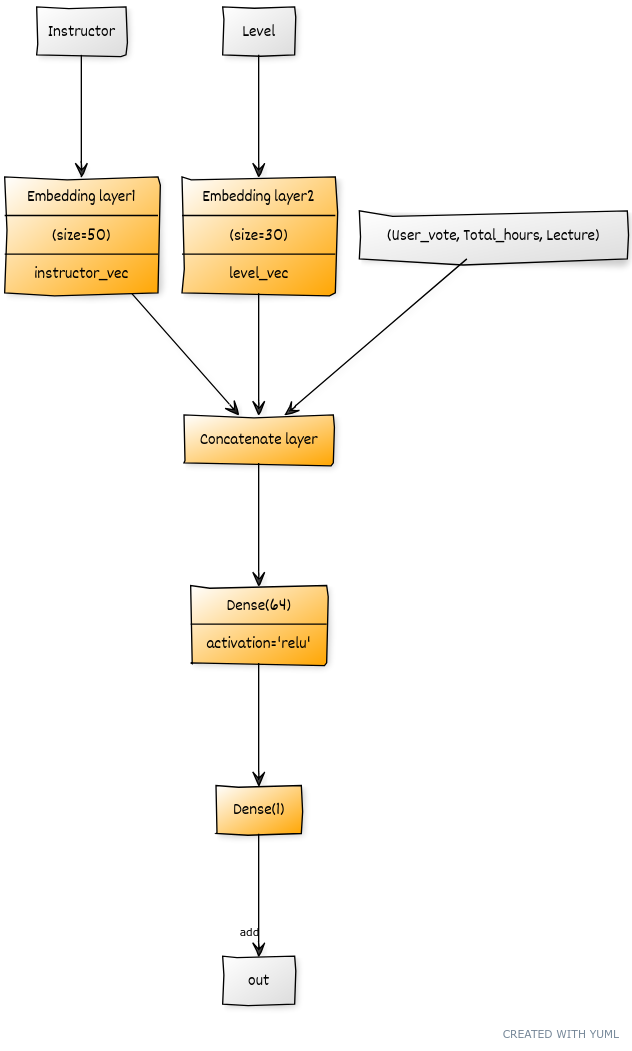

In [ ]:
## Your solution here.
import tensorflow as tf
from tensorflow import keras
from keras import layers

class PlainRS(keras.Model):
    def __init__(self, n_instructor, n_level, **kwargs):

        super(PlainRS, self).__init__(**kwargs)

        self.n_instructor = n_instructor
        self.n_level = n_level

        ## Embedding layers
        self.instructor_embedding = layers.Embedding(input_dim = n_instructor, output_dim = 50)
        self.level_embedding = layers.Embedding(input_dim = n_level, output_dim = 30)

        ## Dense layers
        self.dense1 = layers.Dense(64, activation = 'relu')
        self.out = layers.Dense(1)

        ## Concatenate layers
        self.concat = layers.Concatenate()

    def call(self, inputs):

        X_Con, X_Cat = inputs[0], inputs[1]

        # categorical -> embed
        instructor_vec = self.instructor_embedding(X_Cat[:,0])
        level_vec = self.level_embedding(X_Cat[:,1])

        # Concatenate + Dense
        all_vec = self.concat([instructor_vec, level_vec, X_Con])
        all_dense_vec = self.dense1(all_vec)
        output = self.out(all_dense_vec)

        return output


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state=42)
Con_train, Cat_train = train[continuous].values, train[categorical].values

Con_test, Cat_test = test[continuous].values, test[categorical].values

y_train = train['Rating'].values
y_test = test['Rating'].values

n_instructor = max(max((Cat_train)[:,0]), max((Cat_test)[:,0])) + 1
n_level = max(max((Cat_train)[:,1]), max((Cat_test)[:,1])) + 1


In [ ]:
## define model
Plain_model = PlainRS(n_instructor=n_instructor,
                      n_level=n_level)

metrics = [
    keras.metrics.RootMeanSquaredError(name='rmse'),
    keras.metrics.MeanAbsoluteError(name='mae')
]

Plain_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics
)

## model training
callbacks = [keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]


history = Plain_model.fit(
    x=[Con_train, Cat_train],
    y=y_train,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 10.7277 - mae: 3.0117 - rmse: 3.2299 - val_loss: 0.4184 - val_mae: 0.5159 - val_rmse: 0.6468
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3350 - mae: 0.4489 - rmse: 0.5781 - val_loss: 0.2575 - val_mae: 0.3978 - val_rmse: 0.5075
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1880 - mae: 0.3284 - rmse: 0.4335 - val_loss: 0.2134 - val_mae: 0.3605 - val_rmse: 0.4619
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1226 - mae: 0.2573 - rmse: 0.3501 - val_loss: 0.2072 - val_mae: 0.3545 - val_rmse: 0.4552
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0973 - mae: 0.2175 - rmse: 0.3119 - val_loss: 0.2061 - val_mae: 0.3536 - val_rmse: 0.4540
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0900 - mae: 0.2028 - rmse: 0.2999 - val_loss: 0.2052 - val_mae: 0.3514 - val_rmse: 0.4530
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0918 - mae: 0.2034 - rmse: 0.3028 - val

In [ ]:
Plain_model.evaluate([Con_test, Cat_test], y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2143 - mae: 0.3531 - rmse: 0.4628


[0.20945274829864502, 0.45766007900238037, 0.35071903467178345]

## **Q4.2: Implementing a Dizzy Plain Recommender System (DizzyRS) using TensorFlow**

In this task, you will implement a Dizzy Recommender System (DizzyRS) using TensorFlow and train it on the provided Udemy dataset.

**Model Architecture**

The model architecture is demostrated in the figure as follows.

**Implementation Requirements:**

1. Implement the `DizzyRS` as a  `Keras.Model` class.
2. Train the model on the pre-processed Udemy dataset, and monitor the Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) during the training epochs.
3. Implement early stopping with validation RMSE, using a patience of 5 epochs.
4. For other unspecified hyperparameters, reasonable  values can be chosen.

> The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

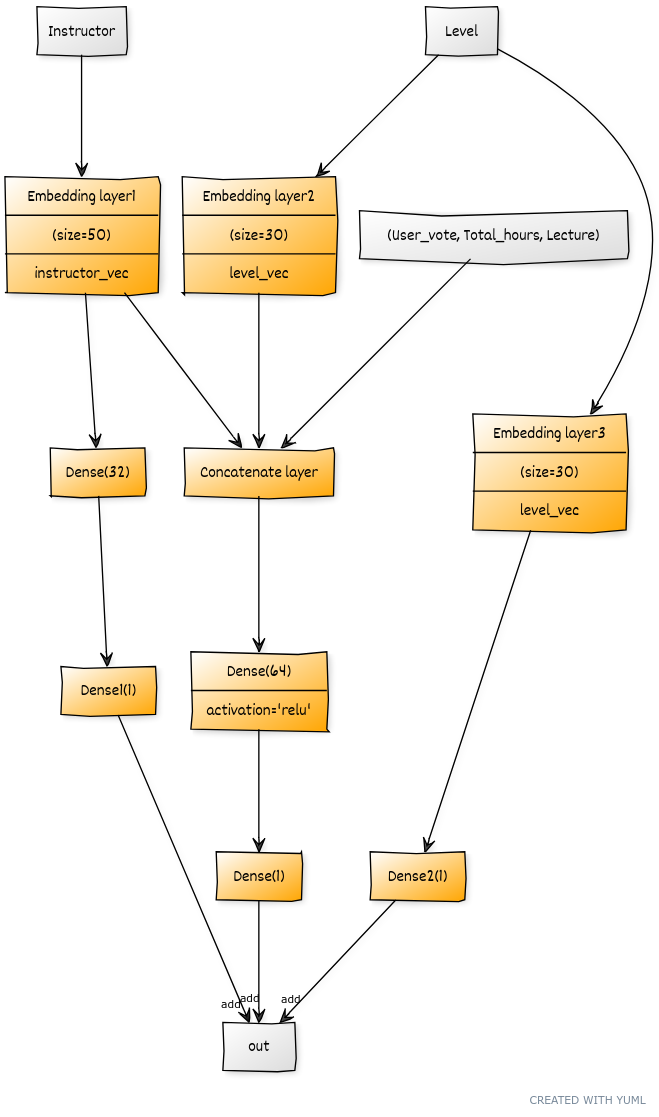

In [ ]:
## Your solution here.
import tensorflow as tf
from tensorflow import keras
from keras import layers

class DizzyRS(keras.Model):
    def __init__(self, n_instructor, n_level, **kwargs):

        super(DizzyRS, self).__init__(**kwargs)

        self.n_instructor = n_instructor
        self.n_level = n_level

        ## Embedding layers
        self.instructor_embedding = layers.Embedding(input_dim = n_instructor, output_dim = 50)
        self.level_embedding1 = layers.Embedding(input_dim = n_level, output_dim = 30)
        self.level_embedding2 = layers.Embedding(input_dim = n_level, output_dim = 30)

        ## Dense layers
        self.instructor_dense = layers.Dense(32, activation = 'relu')
        self.out_instructor = layers.Dense(1)
        self.concat_dense = layers.Dense(64, activation = 'relu')
        self.out_concat = layers.Dense(1)
        self.out_level = layers.Dense(1)

        ## Concatenate layers
        self.concat = layers.Concatenate()

    def call(self, inputs):

        X_Con, X_Cat = inputs[0], inputs[1]

        # categorical -> embed
        instructor_vec = self.instructor_embedding(X_Cat[:,0])
        level_vec1 = self.level_embedding1(X_Cat[:,1])
        level_vec2 = self.level_embedding2(X_Cat[:,1])

        # Instructor Dense
        instructor_dense_vec = self.instructor_dense(instructor_vec)
        output_instructor = self.out_instructor(instructor_dense_vec)

        # Concat Dense
        concat_vec = self.concat([instructor_vec, level_vec1, X_Con])
        concat_dense_vec = self.concat_dense(concat_vec)
        output_concat = self.out_instructor(instructor_dense_vec)

        # Level Dense
        out_level = self.out_level(level_vec2)

        return output_instructor + output_concat + out_level


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.3, random_state=42)
Con_train, Cat_train = train[continuous].values, train[categorical].values

Con_test, Cat_test = test[continuous].values, test[categorical].values

y_train = train['Rating'].values
y_test = test['Rating'].values

n_instructor = max(max((Cat_train)[:,0]), max((Cat_test)[:,0])) + 1
n_level = max(max((Cat_train)[:,1]), max((Cat_test)[:,1])) + 1


In [ ]:
## define model
Dizzy_model = DizzyRS(n_instructor=n_instructor,
                      n_level=n_level)

metrics = [
    keras.metrics.RootMeanSquaredError(name='rmse'),
    keras.metrics.MeanAbsoluteError(name='mae')
]

Dizzy_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=metrics
)

## model training
callbacks = [keras.callbacks.EarlyStopping(
    monitor='val_rmse', min_delta=0, patience=5, verbose=1,
    mode='min', baseline=None, restore_best_weights=True)]


history = Dizzy_model.fit(
    x=[Con_train, Cat_train],
    y=y_train,
    batch_size=64,
    epochs=50,
    verbose=1,
    validation_split=0.2,
    callbacks=callbacks
)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'dizzy_rs', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:855: UserWarning: Gradients do not exist for variables ['dizzy_rs/embedding_7/embeddings', 'dizzy_rs/dense_8/kernel', 'dizzy_rs/dense_8/bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 9.7386 - mae: 2.9056 - rmse: 3.0737 - val_loss: 0.5024 - val_mae: 0.5551 - val_rmse: 0.7088
Epoch 2/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3460 - mae: 0.4514 - rmse: 0.5874 - val_loss: 0.2672 - val_mae: 0.4051 - val_rmse: 0.5170
Epoch 3/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1650 - mae: 0.3002 - rmse: 0.4058 - val_loss: 0.2402 - val_mae: 0.3798 - val_rmse: 0.4901
Epoch 4/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1055 - mae: 0.2312 - rmse: 0.3247 - val_loss: 0.2412 - val_mae: 0.3813 - val_rmse: 0.4912
Epoch 5/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0912 - mae: 0.2047 - rmse: 0.3019 - val_loss: 0.2371 - val_mae: 0.3764 - val_rmse: 0.4869
Epoch 6/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0918 - mae: 0.2007 - rmse: 0.3029 - val_loss: 0.2391 - val_mae: 0.3779 - val_rmse: 0.4890
Epoch 7/50
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0913 - mae: 0.1992 - rmse: 0.3020 - val_loss: 0.

In [ ]:
Dizzy_model.evaluate([Con_test, Cat_test], y_test)

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2269 - mae: 0.3651 - rmse: 0.4762


[0.22102388739585876, 0.4701317846775055, 0.36151865124702454]